![Illustration of silhouetted heads](mentalhealth.jpg) 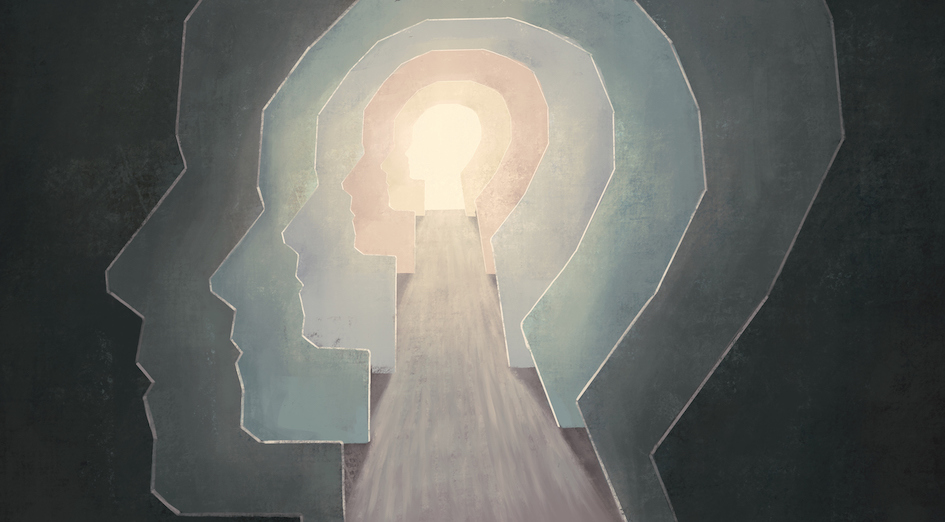

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [119]:
-- Run this code to save the CSV file as students
SELECT * 
FROM 'students.csv';

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,222,None,None,None,None,None,None,None,None,None
282,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,249,None,None,None,None,None,None,None,None,None
283,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,203,None,None,None,None,None,None,None,None,None
284,None,None,None,None,NaN,NaN,NaN,None,NaN,None,NaN,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,247,None,None,None,None,None,None,None,None,None


In [120]:
-- Summary stats of social connectedness (SCS test) scores
SELECT  MIN(tosc) AS min_scs_score,
		MAX(tosc) AS max_scs_score,
		ROUND(AVG(tosc),2) AS avg_scs_score
FROM 'students.csv';

,min_scs_score,max_scs_score,avg_scs_score
0,8,48,37.47


In [121]:
-- Summary stats of SCS scores for International students only
SELECT  inter_dom,
		MIN(tosc) AS min_scs_score,
		MAX(tosc) AS max_scs_score,
		ROUND(AVG(tosc),2) AS avg_scs_score
FROM 'students.csv'
WHERE inter_dom = 'Inter'
GROUP by inter_dom;

,inter_dom,min_scs_score,max_scs_score,avg_scs_score
0,Inter,11,48,37.42


In [122]:
-- Summary stats of accumulative stress (ASISS test)
SELECT MIN(toas) AS min_asiss_score,
		MAX(toas) AS max_asiss_score,
		ROUND(AVG(toas),2) AS avg_asiss_score
FROM 'students.csv';

,min_asiss_score,max_asiss_score,avg_asiss_score
0,36,145,72.38


In [123]:
-- Summary stats of accumulative stress (ASISS test) for International students 
-- only
SELECT  inter_dom,
        MIN(toas) AS min_asiss_score,
		MAX(toas) AS max_asiss_score,
		ROUND(AVG(toas),2) AS avg_asiss_score
FROM 'students.csv'
WHERE inter_dom = 'Inter'
GROUP BY inter_dom;

,inter_dom,min_asiss_score,max_asiss_score,avg_asiss_score
0,Inter,36,145,75.56


In [124]:
-- Summary stats of depression scores
SELECT MIN(todep) AS min_dep_score,
		MAX(todep) AS max_dep_score,
		ROUND(AVG(todep),2) AS avg_dep_score
FROM 'students.csv';

,min_dep_score,max_dep_score,avg_dep_score
0,0,25,8.19


In [125]:
-- Summary stats of depression scores (todep) for International students only
SELECT  inter_dom,
        MIN(todep) AS min_dep_score,
		MAX(todep) AS max_dep_score,
		ROUND(AVG(todep),2) AS avg_dep_score
FROM 'students.csv'
WHERE inter_dom = 'Inter'
GROUP BY inter_dom;

,inter_dom,min_dep_score,max_dep_score,avg_dep_score
0,Inter,0,25,8.04


In [126]:
-- Count of all records to verify matching count to DB
SELECT COUNT(*) AS total_records
FROM 'students.csv';

,total_records
0,286


In [127]:
-- Count of all students, filtered by student type 
SELECT COUNT(inter_dom) AS count_inter_dom
FROM 'students.csv'
GROUP BY inter_dom;

,count_inter_dom
0,201
1,67
2,0


In [128]:
-- Count of international students
SELECT COUNT(inter_dom) AS count_inter_students
FROM 'students.csv'
WHERE inter_dom = 'Inter';

,count_inter_students
0,201


In [129]:
-- Count of domestic students
SELECT COUNT(inter_dom) AS count_dom_students
FROM 'students.csv'
WHERE inter_dom = 'Dom';

,count_dom_students
0,67


In [130]:
-- Count of students will null information
SELECT COUNT(inter_dom) AS count_null_students
FROM 'students.csv'
WHERE inter_dom IS null;

,count_null_students
0,0


In [131]:
SELECT  stay,
		ROUND(AVG(todep), 2) AS average_phq,
		ROUND(AVG(tosc), 2) AS average_scs,
		ROUND(AVG(toas), 2) AS average_as
FROM students 
WHERE stay IS NOT NULL
GROUP BY stay
ORDER BY stay DESC;

,stay,average_phq,average_scs,average_as
0,10.0,13.00,32.00,50.00
1,8.0,10.00,44.00,65.00
2,7.0,4.00,48.00,45.00
3,6.0,6.00,38.00,58.67
4,5.0,7.67,34.00,89.00
5,4.0,7.96,35.00,78.74
6,3.0,8.87,37.78,71.35
7,2.0,8.58,37.08,74.87
8,1.0,7.70,37.94,71.03


In [132]:
-- Impact of length of stay on average diagnostic scores
SELECT  stay,
		ROUND(AVG(todep), 2) AS average_phq,
		ROUND(AVG(tosc), 2) AS average_scs,
		ROUND(AVG(toas), 2) AS average_as
FROM students 
WHERE inter_dom = 'Inter' AND stay IS NOT NULL
GROUP BY stay
ORDER BY stay DESC;

,stay,average_phq,average_scs,average_as
0,10.0,13.00,32.00,50.00
1,8.0,10.00,44.00,65.00
2,7.0,4.00,48.00,45.00
3,6.0,6.00,38.00,58.67
4,5.0,0.00,34.00,91.00
5,4.0,8.57,33.93,87.71
6,3.0,9.09,37.13,78.00
7,2.0,8.28,37.08,77.67
8,1.0,7.48,38.11,72.80
